In [6]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from time import time

In [2]:
## read in data
train_set = pd.read_csv('drugsComTrain_raw.csv')
val_set = pd.read_csv('drugsComTest_raw.csv')

In [4]:
train_set.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
train_set.shape

(161297, 7)

In [4]:
val_set.shape

(53766, 7)

In [5]:
train_set.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [7]:
len(set(train_set.condition))

885

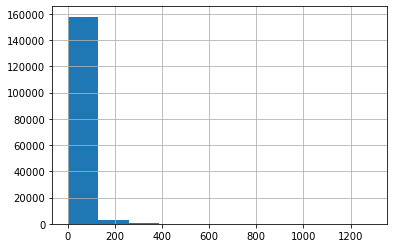

In [8]:
train_set.usefulCount.hist()

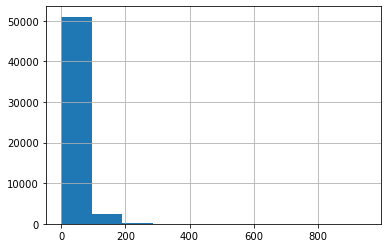

In [24]:
val_set.usefulCount.hist()

In [9]:
train_set[train_set.usefulCount==max(train_set.usefulCount)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291


In [17]:
len(set(val_set.condition))

709

In [20]:
len(set(train_set.drugName))

3436

In [21]:
len(set(val_set.drugName))

2637

In [28]:
len(set(train_set.review))

112329

In [10]:
## borrowed Jacob's codes
def replacements(string):
    replace_dict = {'"'      : '',
                    '&#039;' : "'",
                    '&amp'   : '&'}
    
    for key, value in replace_dict.items():
        string = string.replace(key, value)
        
    return string

In [11]:
train_set.review = train_set.review.map(replacements)
val_set.review = val_set.review.map(replacements)

In [25]:
train_set['sent'] = train_set.review.map(sent_tokenize)
train_set['word'] = train_set.review.map(word_tokenize)

In [26]:
train_set.word[0]

['It',
 'has',
 'no',
 'side',
 'effect',
 ',',
 'I',
 'take',
 'it',
 'in',
 'combination',
 'of',
 'Bystolic',
 '5',
 'Mg',
 'and',
 'Fish',
 'Oil']